In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

a) Representação das Unidades da Federação do Brasil em Grafo

Primeiro, estamos definindo as unidades federativas e suas fronteiras

In [ ]:
unidades_federativas = [
    'AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA',
    'MT', 'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN',
    'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO'
]

uf_nome_completo = {
    'AC': 'Acre', 'AL': 'Alagoas', 'AP': 'Amapá', 'AM': 'Amazonas', 'BA': 'Bahia',
    'CE': 'Ceará', 'DF': 'Distrito Federal', 'ES': 'Espírito Santo', 'GO': 'Goiás',
    'MA': 'Maranhão', 'MT': 'Mato Grosso', 'MS': 'Mato Grosso do Sul', 'MG': 'Minas Gerais',
    'PA': 'Pará', 'PB': 'Paraíba', 'PR': 'Paraná', 'PE': 'Pernambuco', 'PI': 'Piauí',
    'RJ': 'Rio de Janeiro', 'RN': 'Rio Grande do Norte', 'RS': 'Rio Grande do Sul',
    'RO': 'Rondônia', 'RR': 'Roraima', 'SC': 'Santa Catarina', 'SP': 'São Paulo',
    'SE': 'Sergipe', 'TO': 'Tocantins'
}

arestas = [
    ('AC', 'AM'), ('AC', 'RO'),
    ('AL', 'BA'), ('AL', 'PE'), ('AL', 'SE'),
    ('AP', 'PA'),
    ('AM', 'MT'), ('AM', 'PA'), ('AM', 'RO'), ('AM', 'RR'),
    ('BA', 'ES'), ('BA', 'GO'), ('BA', 'MG'), ('BA', 'PE'), ('BA', 'PI'), ('BA', 'SE'), ('BA', 'TO'),
    ('CE', 'PB'), ('CE', 'PE'), ('CE', 'PI'), ('CE', 'RN'),
    ('DF', 'GO'), ('DF', 'MG'),
    ('ES', 'MG'), ('ES', 'RJ'),
    ('GO', 'MT'), ('GO', 'MS'), ('GO', 'MG'), ('GO', 'TO'),
    ('MA', 'PA'), ('MA', 'PI'), ('MA', 'TO'),
    ('MT', 'MS'), ('MT', 'PA'), ('MT', 'RO'), ('MT', 'TO'),
    ('MS', 'PR'), ('MS', 'SP'), ('MS', 'MG'),
    ('MG', 'RJ'), ('MG', 'SP'),
    ('PA', 'RR'), ('PA', 'TO'),
    ('PB', 'PE'), ('PB', 'RN'),
    ('PR', 'SC'), ('PR', 'SP'),
    ('PE', 'PI'),
    ('PI', 'TO'),
    ('RS', 'SC'),
    ('RJ', 'SP')
]

Desenho do grafo:

In [ ]:
grafo = nx.Graph()

In [ ]:
grafo.add_nodes_from(unidades_federativas)
grafo.add_edges_from(arestas)

Posicionando os nós de forma que o gráfico fique visualmente agradável

In [ ]:
pos = nx.spring_layout(grafo, k=0.5, iterations=50, seed=42)

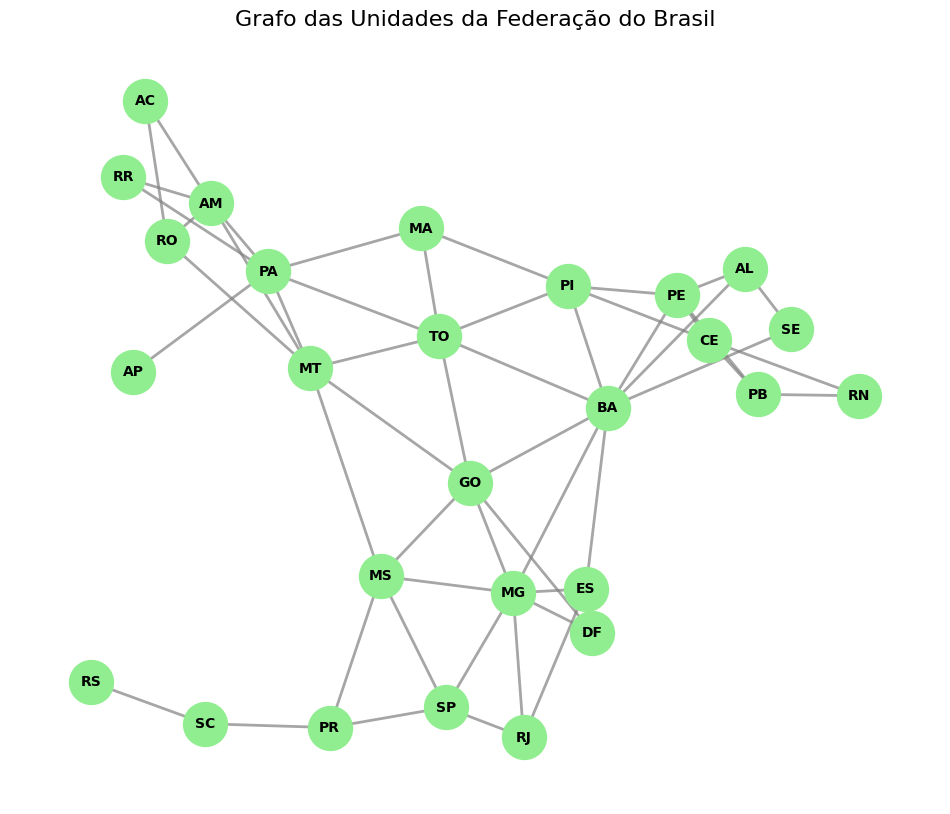

In [ ]:
# definição do tamanho da imagem e o título/fonte
plt.figure(figsize=(12, 10))
plt.title("Grafo das Unidades da Federação do Brasil", fontsize=16)

# desenha os nós
nx.draw_networkx_nodes(grafo, pos, node_size=1000, node_color="lightgreen")

# desenhando as arestas
nx.draw_networkx_edges(grafo, pos, width=2, edge_color='gray', alpha=0.7)

# legenda dos nós
nx.draw_networkx_labels(grafo, pos, font_size=10, font_weight='bold')

# remove os eixos e mostra os grafos
plt.axis('off')
plt.show()

Utilizamos um dicionário para mapear as UFs para índices numéricos.

In [ ]:
uf_para_index = {
    uf: i for i, uf in enumerate(unidades_federativas)
}

index_para_uf = {
    i: uf for i, uf in enumerate(unidades_federativas)
}


##### Representação 1 -> Matriz de Adjacência

In [ ]:
print("=== Matriz de Adjacência ===")

=== Matriz de Adjacência ===


Forma de representar a conexão direta entre os vértices (os estados).
"Quem é vizinho de quem?"

In [ ]:
quant_nos = len(unidades_federativas)
matriz_adj = [[0] * quant_nos for _ in range(quant_nos)]
print("quantidade de unidades federativas: ", quant_nos)

quantidade de unidades federativas:  27


In [ ]:
for u, v in arestas:
  u_idx, v_idx = uf_para_index[u], uf_para_index[v]
  # marcam a existência da aresta (o grafo é não-direcionado, precisamos definir o 1 nas duas posições da matriz)
  matriz_adj[u_idx][v_idx] = 1
  matriz_adj[v_idx][u_idx] = 1

In [ ]:
print("     " + " ".join([f"{uf:2}" for uf in unidades_federativas]))
print("   " + "---" * len(unidades_federativas))

for i in range(quant_nos):
    linha_str = " ".join([f"{val:2}" for val in matriz_adj[i]])
    print(f"{unidades_federativas[i]:<3}| {linha_str}")

     AC AL AP AM BA CE DF ES GO MA MT MS MG PA PB PR PE PI RJ RN RS RO RR SC SP SE TO
   ---------------------------------------------------------------------------------
AC |  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
AL |  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  1  0
AP |  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
AM |  1  0  0  0  0  0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0  1  1  0  0  0  0
BA |  0  1  0  0  0  0  0  1  1  0  0  0  1  0  0  0  1  1  0  0  0  0  0  0  0  1  1
CE |  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  1  0  1  0  0  0  0  0  0  0
DF |  0  0  0  0  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
ES |  0  0  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0
GO |  0  0  0  0  1  0  1  0  0  0  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1
MA |  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0

O valor 1 em uma pos. (l, c) indica que existe uma fronteira (aresta) entre o estado daquela linha e o estado daquela coluna.

Essa matriz é ineficiente para grafos com poucas arestas porque vai ter muitos zeros e consumir grande quantidade de memória.

##### Representação 2 -> Matriz de Incidência

In [ ]:
print("\n=== Matriz de Incidência ===")


=== Matriz de Incidência ===


Forma de representar a relação entre os vértices e as arestas.

In [ ]:
quant_arestas = len(arestas)
print(quant_arestas)
matriz_inc = [[0] * quant_arestas for _ in range(quant_nos)]

for i, (j, k) in enumerate(arestas):
  j_idx, k_idx = uf_para_index[j], uf_para_index[k]
  matriz_inc[j_idx][i] = 1
  matriz_inc[k_idx][i] = 1

51


In [ ]:
print("Índices das Arestas:")
for i, aresta in enumerate(arestas):
    print(f"[{i:2}] = {aresta[0]}-{aresta[1]}", end="  ")
    if (i + 1) % 5 == 0:  # quebra de linha a cada 5 arestas
        print()
print("\n")

# cabeçalho das colunas
header = "    " + "".join([f"{i:3}" for i in range(quant_arestas)])
print(header)
print("    " + "---" * quant_arestas)

for i in range(quant_nos):
    linha_str = "".join([f"{val:3}" for val in matriz_inc[i]])
    print(f"{unidades_federativas[i]:<3}|{linha_str}")

Índices das Arestas:
[ 0] = AC-AM  [ 1] = AC-RO  [ 2] = AL-BA  [ 3] = AL-PE  [ 4] = AL-SE  
[ 5] = AP-PA  [ 6] = AM-MT  [ 7] = AM-PA  [ 8] = AM-RO  [ 9] = AM-RR  
[10] = BA-ES  [11] = BA-GO  [12] = BA-MG  [13] = BA-PE  [14] = BA-PI  
[15] = BA-SE  [16] = BA-TO  [17] = CE-PB  [18] = CE-PE  [19] = CE-PI  
[20] = CE-RN  [21] = DF-GO  [22] = DF-MG  [23] = ES-MG  [24] = ES-RJ  
[25] = GO-MT  [26] = GO-MS  [27] = GO-MG  [28] = GO-TO  [29] = MA-PA  
[30] = MA-PI  [31] = MA-TO  [32] = MT-MS  [33] = MT-PA  [34] = MT-RO  
[35] = MT-TO  [36] = MS-PR  [37] = MS-SP  [38] = MS-MG  [39] = MG-RJ  
[40] = MG-SP  [41] = PA-RR  [42] = PA-TO  [43] = PB-PE  [44] = PB-RN  
[45] = PR-SC  [46] = PR-SP  [47] = PE-PI  [48] = PI-TO  [49] = RS-SC  
[50] = RJ-SP  

      0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
    -------------------------------------------------------------------------------------------

###### Representação 3 -> Lista Indexada

In [ ]:
print("\n=== Lista Indexada (Vetor de Listas de Adjacência) ===")


=== Lista Indexada (Vetor de Listas de Adjacência) ===


A ideia principal é armazenar todas as conexões do grafo em uma única lista contínua (β), e usar uma segunda lista (α) para indicar onde cada nó começa na lista de conexões. É como ter um sumário (α) que te direciona para a página exata (β) onde você encontra os vizinhos de um nó.

Criação de uma lista de adj. temp. para facilitar a criação das tabelas. Isso armazena os vizinhos de cada nó.

In [ ]:
adj_list_temp = [[] for _ in range(quant_nos)]
for u, v in arestas:
    u_idx, v_idx = uf_para_index[u], uf_para_index[v]
    adj_list_temp[u_idx].append(v)
    adj_list_temp[v_idx].append(u)

A tabela alfa é o ind. de início dos vizinhos de cada nó na tabela Beta.

In [ ]:
tabela_alfa = [0] * (quant_nos + 1)
tabela_alfa[0] = 0
# a tab. alfa está preenchida com os ind. de início
# o índice de início de um nó 'i' é a soma dos tamanhos das listas de vizinhos dos nós anteriores.
for i in range(quant_nos):
    tabela_alfa[i+1] = tabela_alfa[i] + len(adj_list_temp[i])

Essa tabela armazena todos os vizinhos de forma sequencial. O tam. é o dobro do número de aresta, pois cada aresta é armazenada duas vezes (uma para cada nó).

In [ ]:
tabela_beta = [None] * (2 * quant_arestas)
pos_atual_beta = 0
# preenchimento da tabela beta
for i in range(quant_nos):
    for vizinho in adj_list_temp[i]:
        tabela_beta[pos_atual_beta] = vizinho
        pos_atual_beta += 1

In [ ]:
print("\nTabela Alfa (índice de início):")
print(tabela_alfa)

print("\nTabela Beta (vizinhos):")
print(tabela_beta)


Tabela Alfa (índice de início):
[0, 2, 5, 6, 11, 19, 23, 25, 28, 34, 37, 43, 48, 55, 61, 64, 67, 72, 77, 80, 82, 83, 86, 88, 90, 94, 96, 102]

Tabela Beta (vizinhos):
['AM', 'RO', 'BA', 'PE', 'SE', 'PA', 'AC', 'MT', 'PA', 'RO', 'RR', 'AL', 'ES', 'GO', 'MG', 'PE', 'PI', 'SE', 'TO', 'PB', 'PE', 'PI', 'RN', 'GO', 'MG', 'BA', 'MG', 'RJ', 'BA', 'DF', 'MT', 'MS', 'MG', 'TO', 'PA', 'PI', 'TO', 'AM', 'GO', 'MS', 'PA', 'RO', 'TO', 'GO', 'MT', 'PR', 'SP', 'MG', 'BA', 'DF', 'ES', 'GO', 'MS', 'RJ', 'SP', 'AP', 'AM', 'MA', 'MT', 'RR', 'TO', 'CE', 'PE', 'RN', 'MS', 'SC', 'SP', 'AL', 'BA', 'CE', 'PB', 'PI', 'BA', 'CE', 'MA', 'PE', 'TO', 'ES', 'MG', 'SP', 'CE', 'PB', 'SC', 'AC', 'AM', 'MT', 'AM', 'PA', 'PR', 'RS', 'MS', 'MG', 'PR', 'RJ', 'AL', 'BA', 'BA', 'GO', 'MA', 'MT', 'PA', 'PI']


Exemplo de consulta:

In [ ]:
print("\nVizinhos de cada Unidade da Federação:")
for uf in unidades_federativas:

    uf_idx = uf_para_index[uf]

    inicio = tabela_alfa[uf_idx]
    fim = tabela_alfa[uf_idx + 1]

    vizinhos_uf = tabela_beta[inicio:fim]

    print(f"  {uf_nome_completo[uf]} ({uf}) -> {vizinhos_uf}")


Vizinhos de cada Unidade da Federação:
  Acre (AC) -> ['AM', 'RO']
  Alagoas (AL) -> ['BA', 'PE', 'SE']
  Amapá (AP) -> ['PA']
  Amazonas (AM) -> ['AC', 'MT', 'PA', 'RO', 'RR']
  Bahia (BA) -> ['AL', 'ES', 'GO', 'MG', 'PE', 'PI', 'SE', 'TO']
  Ceará (CE) -> ['PB', 'PE', 'PI', 'RN']
  Distrito Federal (DF) -> ['GO', 'MG']
  Espírito Santo (ES) -> ['BA', 'MG', 'RJ']
  Goiás (GO) -> ['BA', 'DF', 'MT', 'MS', 'MG', 'TO']
  Maranhão (MA) -> ['PA', 'PI', 'TO']
  Mato Grosso (MT) -> ['AM', 'GO', 'MS', 'PA', 'RO', 'TO']
  Mato Grosso do Sul (MS) -> ['GO', 'MT', 'PR', 'SP', 'MG']
  Minas Gerais (MG) -> ['BA', 'DF', 'ES', 'GO', 'MS', 'RJ', 'SP']
  Pará (PA) -> ['AP', 'AM', 'MA', 'MT', 'RR', 'TO']
  Paraíba (PB) -> ['CE', 'PE', 'RN']
  Paraná (PR) -> ['MS', 'SC', 'SP']
  Pernambuco (PE) -> ['AL', 'BA', 'CE', 'PB', 'PI']
  Piauí (PI) -> ['BA', 'CE', 'MA', 'PE', 'TO']
  Rio de Janeiro (RJ) -> ['ES', 'MG', 'SP']
  Rio Grande do Norte (RN) -> ['CE', 'PB']
  Rio Grande do Sul (RS) -> ['SC']
  Rondônia

##### Análise de graus e frequência

In [ ]:
print("\n=== Análise de Graus ===")


=== Análise de Graus ===


Para matriz de adjacência

In [ ]:
# grau de cada uf
graus_adj = {}
for i in range(quant_nos):
    grau = sum(matriz_adj[i])
    graus_adj[unidades_federativas[i]] = grau

max_grau_adj = max(graus_adj.values())
min_grau_adj = min(graus_adj.values())

max_estados_adj = [uf for uf, grau in graus_adj.items() if grau == max_grau_adj]
min_estados_adj = [uf for uf, grau in graus_adj.items() if grau == min_grau_adj]

print(f"\nGrau máximo = {max_grau_adj}")
for uf in max_estados_adj:
    vizinhos = []
    uf_idx = uf_para_index[uf]
    for i in range(quant_nos):
        if matriz_adj[uf_idx][i] == 1:
            vizinhos.append(uf_nome_completo[index_para_uf[i]])
    print(f"  Unidade da Federação: {uf_nome_completo[uf]} ({uf})")
    print(f"  Vizinhos: {', '.join(vizinhos)}")

print(f"\nGrau mínimo = {min_grau_adj}")
for uf in min_estados_adj:
    vizinhos = []
    uf_idx = uf_para_index[uf]
    for i in range(quant_nos):
        if matriz_adj[uf_idx][i] == 1:
            vizinhos.append(uf_nome_completo[index_para_uf[i]])
    print(f"  Unidade da Federação: {uf_nome_completo[uf]} ({uf})")
    print(f"  Vizinhos: {', '.join(vizinhos)}")

freq_graus_adj = defaultdict(int)
for grau in graus_adj.values():
    freq_graus_adj[grau] += 1

print("\nFrequência dos Graus:")
for grau, freq in sorted(freq_graus_adj.items()):
    print(f"  Grau {grau}: {freq} estados")


Grau máximo = 8
  Unidade da Federação: Bahia (BA)
  Vizinhos: Alagoas, Espírito Santo, Goiás, Minas Gerais, Pernambuco, Piauí, Sergipe, Tocantins

Grau mínimo = 1
  Unidade da Federação: Amapá (AP)
  Vizinhos: Pará
  Unidade da Federação: Rio Grande do Sul (RS)
  Vizinhos: Santa Catarina

Frequência dos Graus:
  Grau 1: 2 estados
  Grau 2: 6 estados
  Grau 3: 7 estados
  Grau 4: 2 estados
  Grau 5: 4 estados
  Grau 6: 4 estados
  Grau 7: 1 estados
  Grau 8: 1 estados


Análise de graus para matriz de incidência

In [ ]:
graus_inc = {}
for i in range(quant_nos):
    grau = sum(matriz_inc[i])
    graus_inc[unidades_federativas[i]] = grau

max_grau_inc = max(graus_inc.values())
min_grau_inc = min(graus_inc.values())

max_estados_inc = [uf for uf, grau in graus_inc.items() if grau == max_grau_inc]
min_estados_inc = [uf for uf, grau in graus_inc.items() if grau == min_grau_inc]

print(f"\nGrau máximo = {max_grau_inc}")
for uf in max_estados_inc:
    vizinhos = []
    for aresta_uf1, aresta_uf2 in arestas:
        if aresta_uf1 == uf:
            vizinhos.append(uf_nome_completo[aresta_uf2])
        elif aresta_uf2 == uf:
            vizinhos.append(uf_nome_completo[aresta_uf1])
    print(f"  Unidade da Federação: {uf_nome_completo[uf]} ({uf})")
    print(f"  Vizinhos: {', '.join(vizinhos)}")

print(f"\nGrau mínimo = {min_grau_inc}")
for uf in min_estados_inc:
    vizinhos = []
    for aresta_uf1, aresta_uf2 in arestas:
        if aresta_uf1 == uf:
            vizinhos.append(uf_nome_completo[aresta_uf2])
        elif aresta_uf2 == uf:
            vizinhos.append(uf_nome_completo[aresta_uf1])
    print(f"  Unidade da Federação: {uf_nome_completo[uf]} ({uf})")
    print(f"  Vizinhos: {', '.join(vizinhos)}")

freq_graus_inc = defaultdict(int)
for grau in graus_inc.values():
    freq_graus_inc[grau] += 1

print("\nFrequência dos Graus:")
for grau, freq in sorted(freq_graus_inc.items()):
    print(f"  Grau {grau}: {freq} estados")


Grau máximo = 8
  Unidade da Federação: Bahia (BA)
  Vizinhos: Alagoas, Espírito Santo, Goiás, Minas Gerais, Pernambuco, Piauí, Sergipe, Tocantins

Grau mínimo = 1
  Unidade da Federação: Amapá (AP)
  Vizinhos: Pará
  Unidade da Federação: Rio Grande do Sul (RS)
  Vizinhos: Santa Catarina

Frequência dos Graus:
  Grau 1: 2 estados
  Grau 2: 6 estados
  Grau 3: 7 estados
  Grau 4: 2 estados
  Grau 5: 4 estados
  Grau 6: 4 estados
  Grau 7: 1 estados
  Grau 8: 1 estados


Calculando o grau de cada UF a partir da lista indexada

In [ ]:
graus = {
    unidades_federativas[i]: tabela_alfa[i+1] - tabela_alfa[i] # calc. o num. de vizinhos da UF i (fim - início)
    for i in range(quant_nos)
}

Encontando o grau máximo e mínimo

In [ ]:
max_grau = max(graus.values())
min_grau = min(graus.values())

Identificar as UFs com os graus máximo e mínimo

In [ ]:
max_estados = [uf for uf, grau in graus.items() if grau == max_grau]
min_estados = [uf for uf, grau in graus.items() if grau == min_grau]

Os resultados:

In [ ]:
print(f"\nGrau máximo = {max_grau}")
for uf in max_estados:
    vizinhos_uf = []
    inicio = tabela_alfa[uf_para_index[uf]] # pos. inicial
    fim = tabela_alfa[uf_para_index[uf] + 1] # pos. final
    for i in range(inicio, fim):
        vizinhos_uf.append(uf_nome_completo[tabela_beta[i]])
    print(f"  Unidade da Federação: {uf_nome_completo[uf]} ({uf})")
    print(f"  Vizinhos: {', '.join(vizinhos_uf)}")

print(f"\nGrau mínimo = {min_grau}")
for uf in min_estados:
    vizinhos_uf = []
    inicio = tabela_alfa[uf_para_index[uf]]
    fim = tabela_alfa[uf_para_index[uf] + 1]
    for i in range(inicio, fim):
        vizinhos_uf.append(uf_nome_completo[tabela_beta[i]])
    print(f"  Unidade da Federação: {uf_nome_completo[uf]} ({uf})")
    print(f"  Vizinhos: {', '.join(vizinhos_uf)}")


Grau máximo = 8
  Unidade da Federação: Bahia (BA)
  Vizinhos: Alagoas, Espírito Santo, Goiás, Minas Gerais, Pernambuco, Piauí, Sergipe, Tocantins

Grau mínimo = 1
  Unidade da Federação: Amapá (AP)
  Vizinhos: Pará
  Unidade da Federação: Rio Grande do Sul (RS)
  Vizinhos: Santa Catarina


"Quantos estados fazem fronteiras com 3 outros estados?"

In [ ]:
freq_graus = defaultdict(int) # esse dict começa com 0 para qualquer chave nova
for grau in graus.values():
    freq_graus[grau] += 1

In [ ]:
print("\n=== Frequência dos Graus ===")
for grau, freq in sorted(freq_graus.items()): # ordem crescente
    print(f"  Grau {grau}: {freq} estados")


=== Frequência dos Graus ===
  Grau 1: 2 estados
  Grau 2: 6 estados
  Grau 3: 7 estados
  Grau 4: 2 estados
  Grau 5: 4 estados
  Grau 6: 4 estados
  Grau 7: 1 estados
  Grau 8: 1 estados
